Generating samples from Pareto Distribution through standard Uniform distribution

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Inverse Transformation

CDF of pareto can be written as $ F(x)=1-(\frac{c}{x})^{\alpha} ;$ $x\geq c>0;\alpha>0$
To compute inverse transformation
$$
y = F(x) \implies 1-y = (\frac{c}{x})^{\alpha}\\
\implies (1-y)^{\frac{1}{\alpha}} = \frac{c}{x}\\
$$
$$
\implies x = c[(1-y)^{\frac{-1}{\alpha}}]
$$

### Thus $$ X = c[(1-U)^{\frac{-1}{\alpha}}] $$

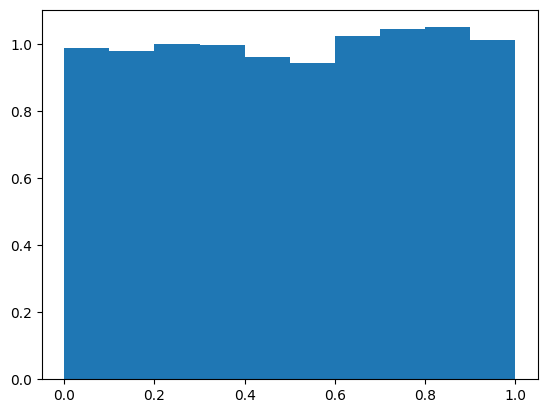

In [15]:
np.random.seed(20)
U = np.random.uniform(size=5000)
plt.hist(U, density=True)
plt.show()

choosing the value of c as 10 and $\alpha=5$


In [16]:
c=10
alpha=5
## function to convert the data from uniform to Pareto
X = c*((1-U)**(-1/alpha))

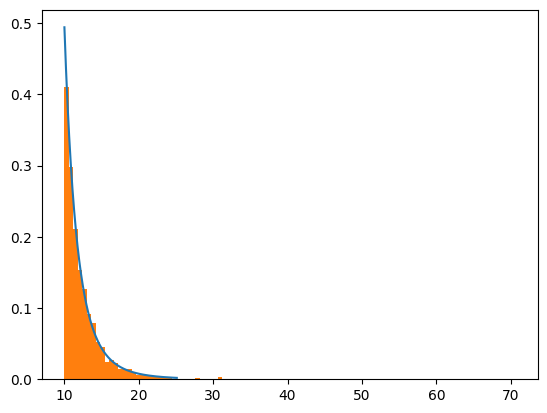

In [24]:
x = np.linspace(pareto.ppf(0.01,alpha,scale=c),pareto.ppf(0.99,alpha,scale=c), 1000)
plt.plot(x,pareto.pdf(x,alpha,scale=c))
plt.hist(X,bins=100,density=True)
plt.show()

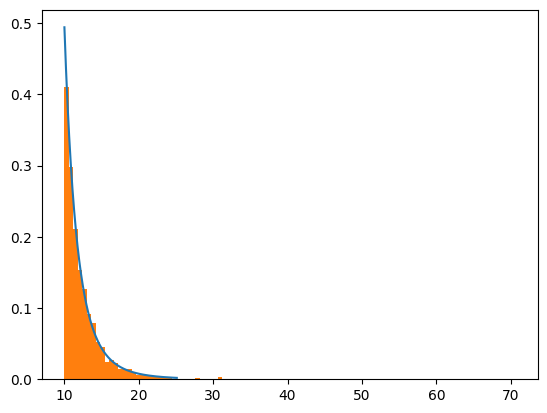

In [31]:
np.random.seed(20)
X_org = (np.random.pareto(alpha,5000)+1)*c
plt.plot(x,pareto.pdf(x,alpha,scale=c))
plt.hist(X_org,bins=100, density=True)
plt.show()

# Acceptance Rejection method

choosing exponential distribution as the g(x) function for covering the density for pareto distribution

<!-- ![Graph 1](msedge_oliLhaqghr.png) -->
<img src="msedge_oliLhaqghr.png" style="width:1000px;height:500px;">

$$
f_{X}(x) = 5*10^5*x^{-6}\\
g_{Y}(x) = 0.5*e^{-0.5*x}
$$

As the domain is different for both the distributions, taking x from exponential will need to be shifted by 10. Therefore,

$$
Z \sim U[0,1];
Y \sim Exp(0.5)
$$

If $ Z \leq \frac{f_{X}(x+10)}{g_{Y}(x)} $ then accept otherwise reject

but Y can be obtained from uniform using $ \frac{-ln(U)}{0.5} $

Then
$ Z,U \sim iid Uni[0,1] $

$ Z \leq \frac{5*10^5*(\frac{-ln(U)}{0.5}+10)^{-6}}{0.5*e^{0.5*\frac{ln(U)}{0.5}}} $

If $ Z \leq \frac{10^6*(-ln(U)+10)^{-6}}{U} $ then accept $\frac{-ln(U)}{0.5}+10$ as the sample point from Pareto distribution



In [27]:
Par = []
U_new = np.random.uniform(size=100000)
for i in U_new:
    Z = np.random.uniform()
    if Z <= (10**6)/i*(-np.log(i)+10)**6:
        Par.append(-np.log(i)/0.5+10)


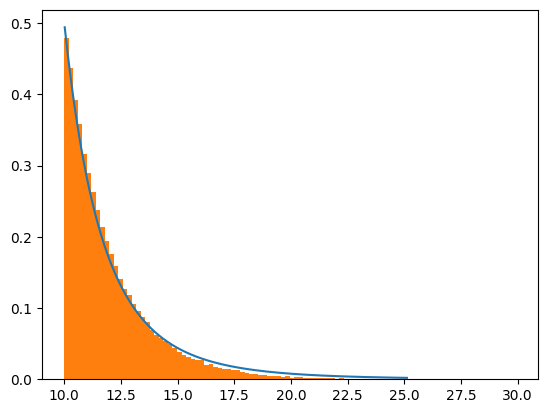

In [28]:
plt.plot(x,pareto.pdf(x,alpha,scale=c))
plt.hist(Par,bins=100,density=True)
plt.show()

In [29]:
%%timeit
np.random.seed(20)
U = np.random.uniform(size=100000)
c=10
alpha=5
X = c*((1-U)**(-1/alpha))

# time the inverse transformation method


4.93 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%%timeit
np.random.seed(22)
X_org = (np.random.pareto(alpha,100000)+1)*c
# time the original generation method


4.18 ms ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
Par = []
U_new = np.random.uniform(size=100000)
for i in U_new:
    Z = np.random.uniform()
    if Z <= (10**6)/i*(-np.log(i)+10)**6:
        Par.append(-np.log(i)/0.5+10)
# time the acceptance rejection method

912 ms ± 184 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
